# Analiza współczynnika tarcia wybranej serii próbek
W wyniku prowadzonych badań tribologicznych uzyskiwane są przebiegi czasowe współczynnika tarcia badanej pary trącej. Wyniki są eksportowane do pliku tekstowego. Pliki z danymi mają taki sam układ danych. Ich analiza polega na pobraniu danych dotyczących współczynnika tarcia, ich uśrednienie za pomocą średniej krokowej oraz zestawienie wyników dla poszczególnych próbek w celu ich porównania. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

## 1. Wczytanie danych
Dane pochodzą z plików csv zapisanych w jednym katalogu. Separatorem dziesiętnym liczb jest ',' natomiast kolumny z danymi oddzielone są znakiem 'TAB'. Pierwsze 56 wierszy pliku zawiera inforamcję na temat warunków pomiarów i parametrów urządzenia pomiarowego, które nie są ważne z punktu widzenia prowadzonej analizy.

In [2]:
# Wczytanie danych przykładowego pliku
df = pd.read_csv(r'C:\Users\MariuszKamiński\python\tarcie Inc 718 15k\I s2.1.txt', 
                 delimiter="\t", 
                 skiprows=56, 
                 header=0, 
                 decimal=","
                 )

In [3]:
df.head(20)

,Time [s],Distance [m],laps,Sequence ID,Cycle ID,Max linear speed [cm/s],Nominal Load [mN],µ,Angle [°],Normal force [mN],Friction force [mN],Penetration depth [µm]
0,0.1,0.000000,0.833,1,0,6.911504,399.999987,0.107756,2.332744,393.552255,42.407779,24.050956
1,0.2,0.010472,0.833,1,0,6.911504,399.999987,0.121754,2.994264,392.082613,47.737462,51.394502
2,0.3,0.020944,0.833,1,0,6.911504,399.999987,0.128169,3.676417,394.656818,50.582734,71.626761
3,0.4,0.031416,0.833,1,0,6.911504,399.999987,0.122779,4.360264,399.640273,49.067301,75.759628
4,0.5,0.041888,0.833,1,0,6.911504,399.999987,0.106677,5.052924,406.101446,43.321533,61.916770
5,0.6,0.052360,0.833,1,0,6.911504,399.999987,0.121561,5.738730,410.470794,49.897177,34.674075
6,0.7,0.062832,0.833,1,0,6.911504,399.999987,0.130861,1.856158,409.121911,53.538096,7.692945
7,0.8,0.069813,1.111,1,1,6.911504,399.999987,0.124169,0.861413,403.982978,50.162328,-5.832419
8,0.9,0.076794,1.222,1,1,6.911504,399.999987,0.125702,1.544385,397.377293,49.951164,-0.403983
9,1.0,0.083776,1.333,1,1,6.911504,399.999987,0.130590,2.229878,391.875248,51.174847,20.015317


### Funkcje do wczytywania i analizy danych źródłowych

In [4]:
# Funkcja do wczytywania danych
def load_data(directory):
    data_frames = {}
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)
            try:
                df = pd.read_csv(file_path, delimiter="\t", skiprows=56, header=0, decimal=",")
                # Konwersja wartości 'laps' do liczby całkowitej za pomocą funkcji floor
                df['laps'] = np.floor(df['laps']).astype(int)
                data_frames[filename] = df
            except Exception as e:
                print(f"Błąd przetwarzania pliku {file_path}: {e}")
    return data_frames

In [5]:
# Funkcja do obliczania średniej wartości współczynnika tarcia w ramach jednego obrótu próbki
def process_data(data_frames):
    results = pd.DataFrame()
    for filename, df in data_frames.items():
        try:
            df['µ'] = df['µ'].astype(float)
            # Grupowanie danych według całkowitych wartości 'laps' i obliczanie średniej
            averages = df.groupby('laps')['µ'].mean()
            averages.name = filename
            results = pd.concat([results, averages], axis=1)
        except KeyError as e:
            print(f"Błąd podczas przetwarzania danych dla {filename}: {e}")
    return results

### Uśrednianie wyników dla każdego obrotu próbki badawczej

In [6]:
user_directory = r"C:\Users\MariuszKamiński\python\tarcie Inc 718 15k"
normalized_path = os.path.normpath(user_directory)

if os.path.isdir(normalized_path):
    source_folder_path = normalized_path
    output_file_path = os.path.join(source_folder_path, "summary.csv")

    # Wczytywanie danych
    data_frames = load_data(source_folder_path)

    # Przetwarzanie danych
    results = process_data(data_frames)
    results.to_csv(output_file_path, sep=";", decimal=".", index=False, header=True)
    print("Dane zostały przetworzone i zapisane w", output_file_path)
else:
    print("Podany katalog nie istnieje. Sprawdź ścieżkę i spróbuj ponownie.")

Dane zostały przetworzone i zapisane w C:\Users\MariuszKamiński\python\tarcie Inc 718 15k\summary.csv


,I s2.1.txt,II s2.1.txt,III s2.1.txt,IV s2.1.txt
0,0.119937,0.124782,0.149923,0.121442
1,0.122023,0.122044,0.164199,0.138398
2,0.132649,0.141099,0.181543,0.146236
3,0.133748,0.152670,0.190322,0.152710
4,0.122301,0.160687,0.199666,0.159287
...,...,...,...,...
14997,0.586023,0.436037,0.504365,0.355837
14998,0.591802,0.434151,0.497824,0.368150
14999,0.587643,0.424586,0.577876,0.416082
15000,0.523410,NaN,NaN,NaN


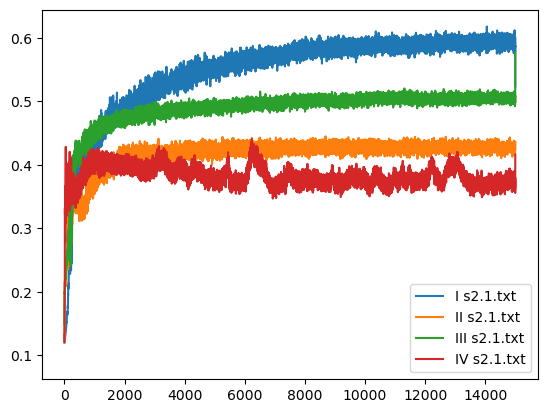

In [7]:
results.dropna()
results.plot()
results

### Średnia krocząca współczynnika tarcia - uśrednianie co n obrotów

<Axes: >

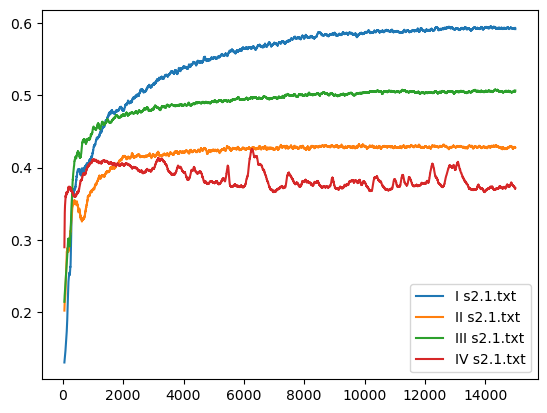

In [8]:
n = 50
moving_averages = results.rolling(window=n).mean()
moving_averages.plot()

## 2. Analiza statystyczna uzyskanych wyników badań 
### Ustalenie punktu stabilizacji wartości współczynnika tarcia
Kształt i przebieg krzywych średnich kroczących współczynnika tarcia dla poszczególnych próbek wskazują, że po pewnym początkowym okresie pracy osiąga on pewną wartość, charakterystyczną dla danej próbki. W celu określenia okresu docierania się pary trącej do momentu osiągnięcia charakterystycznych wartości współczynnika tarcia wykonać należy następujące kroki:
- określenie rozrzutu wartości współczynnika tarcia w końcowym okresie testu gdzie dla kazdej próbki są one stabilne na pewnym charakterstycznym poziomie,
- ustalnie okresu stabilizacji wartości współczynnika tarcia dla każdej próbki

In [9]:
# Ustalenie punktu stabilizacji na podstawie okresowych zmian wariancji współczynnika tarcia
def calculate_stabilization_point(serie, window_size=1000, threshold=0.05):
    # Obliczanie kroczącej wariancji na określonym oknie
    rolling_variance = serie.rolling(window=window_size).var()
    
    # Normalizacja wariancji dla porównywalności
    min_var = rolling_variance.min()
    max_var = rolling_variance.max()
    normalized_variance = (rolling_variance - min_var) / (max_var - min_var)
    
    # Wyszukiwanie punktu stabilizacji jako miejsca, gdzie znormalizowana wariancja spada poniżej progu
    stabilization_point = normalized_variance[normalized_variance < threshold].first_valid_index()
    
    return stabilization_point

In [10]:
# Ustalenie czasu stabilizacji dla każdej serii pomiarowej
stabilization_points = {}
for column in results.columns:
    stabilization_points[column] = calculate_stabilization_point(results[column])

print(stabilization_points)

{'I s2.1.txt': 1940, 'II s2.1.txt': 2370, 'III s2.1.txt': 1435, 'IV s2.1.txt': 1622}


### Dodatkowa analiza przebiegu współczynnika tarcia próbki 'I'
Z uwagi na fakt, że współczynnik tarcia próbki 'I' nie posiada tak wyraźnego 'punktu przegięcia' jak w przypadku próbki 'II' oraz 'III' wynika, należy przeprowadzić dodatkową analizę określającą okres stabilnego wzrostu współczynnika tarcia oraz początek stabilizacji jego wartości.

In [11]:
import ruptures as rpt

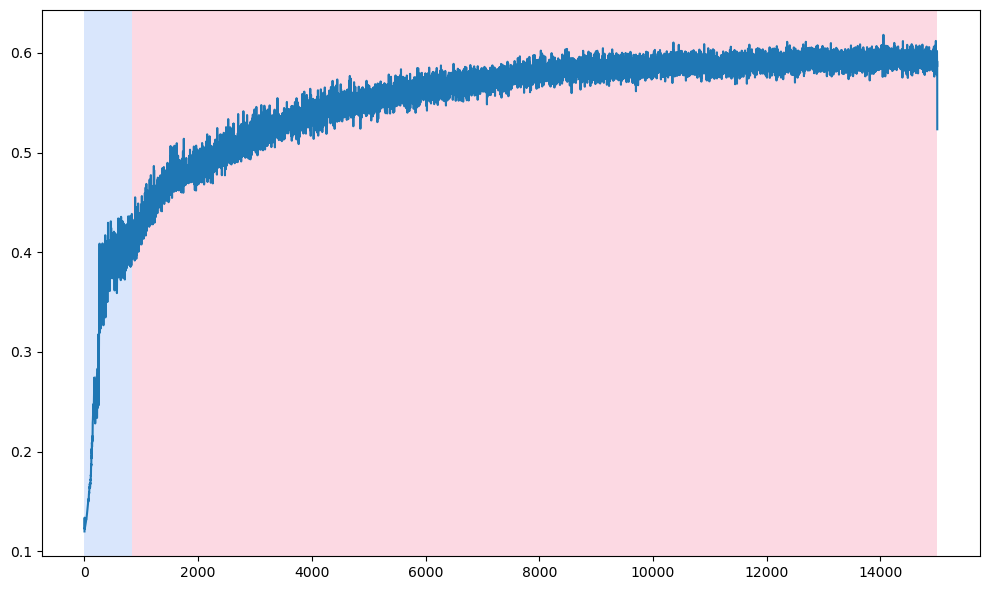

Detected change points: [840, 15002]


In [12]:
# Przykład wykrywania punktów zmian w jednym z zestawów danych (np. 'I s2.1.txt')
def detect_change_points(data, pen=10):
    # Konwersja serii danych do odpowiedniego formatu
    points = np.array(data).reshape(-1, 1)
    
    # Inicjalizacja modelu z algorytmem wykrywania punktów zmian
    model = "l2"  # Można wypróbować różne modele, "l2" to model bazujący na minimalizacji sumy kwadratów
    algo = rpt.Pelt(model=model, min_size=1, jump=5).fit(points)
    
    # Wykrywanie punktów zmian
    result = algo.predict(pen=pen)
    
    # Rysowanie wyników
    rpt.display(points, result, figsize=(10, 6))
    plt.show()
    
    return result

# Użycie funkcji na danych (przykładowo, dla kolumny 'I s2.1.txt')
change_points = detect_change_points(results['I s2.1.txt'], pen=10)

print(f"Detected change points: {change_points}")